# Rectificación térmica

In [1]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
import numpy as np

## Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_context("paper", font_scale = 1.6)
plt.style.use(["science", "grid"])

## Archivos con los datos del flujo de calor

In [3]:
frecuencias = np.loadtxt("datos/frecuencias_heatmap.csv")
frecuencias.size

91

In [4]:
exponentes = np.loadtxt("datos/exponente_heatmap.csv").astype(int)
nexp = exponentes.size

In [5]:
flujocalor_izq = np.loadtxt("datos/flujocalor_izq_heatmap.csv")
flujocalor_izq.shape

(10, 91)

In [6]:
flujocalor_der = np.loadtxt("datos/flujocalor_der_heatmap.csv")
flujocalor_der.shape

(10, 91)

In [7]:
if np.all(flujocalor_der > flujocalor_izq):
    flujocalor_max = flujocalor_der
    flujocalor_min = flujocalor_izq
else:
    flujocalor_max = flujocalor_izq
    flujocalor_min = flujocalor_der

In [8]:
flujocalor = flujocalor_max - flujocalor_min
flujocalor.shape

(10, 91)

In [9]:
df_flujocalor = pd.DataFrame(data = flujocalor,
                                 index = np.round(exponentes, 5),
                                 columns = np.round(frecuencias, 5))
df_flujocalor

,0.0010,0.0015,0.0020,0.0025,0.0030,0.0035,0.0040,0.0045,0.0050,0.0055,...,55.0000,60.0000,65.0000,70.0000,75.0000,80.0000,85.0000,90.0000,95.0000,100.0000
1,0.003411,0.003416,0.003422,0.003427,0.003432,0.003438,0.003443,0.003449,0.003454,0.003459,...,0.003403,0.003403,0.003402,0.003402,0.003402,0.003402,0.003402,0.003402,0.003402,0.003402
2,0.004660,0.004670,0.004680,0.004691,0.004701,0.004712,0.004722,0.004732,0.004743,0.004753,...,0.004642,0.004642,0.004642,0.004642,0.004641,0.004641,0.004641,0.004641,0.004641,0.004641
3,0.005960,0.005977,0.005993,0.006009,0.006026,0.006042,0.006058,0.006075,0.006091,0.006107,...,0.005933,0.005932,0.005932,0.005932,0.005931,0.005931,0.005931,0.005931,0.005931,0.005930
4,0.007236,0.007258,0.007281,0.007303,0.007326,0.007348,0.007370,0.007393,0.007415,0.007438,...,0.007197,0.007196,0.007196,0.007195,0.007195,0.007195,0.007195,0.007194,0.007194,0.007194
5,0.008476,0.008505,0.008533,0.008562,0.008590,0.008619,0.008647,0.008676,0.008704,0.008733,...,0.008426,0.008425,0.008425,0.008424,0.008424,0.008424,0.008424,0.008423,0.008423,0.008423
6,0.009683,0.009718,0.009752,0.009787,0.009821,0.009855,0.009890,0.009924,0.009959,0.009993,...,0.009622,0.009621,0.009621,0.009620,0.009620,0.009620,0.009619,0.009619,0.009619,0.009619
7,0.010861,0.010901,0.010941,0.010981,0.011022,0.011062,0.011102,0.011142,0.011182,0.011223,...,0.010789,0.010788,0.010788,0.010787,0.010787,0.010786,0.010786,0.010785,0.010785,0.010785
8,0.012012,0.012058,0.012104,0.012150,0.012196,0.012241,0.012287,0.012333,0.012379,0.012425,...,0.011930,0.011929,0.011928,0.011928,0.011927,0.011927,0.011926,0.011926,0.011926,0.011925
9,0.013140,0.013192,0.013243,0.013295,0.013346,0.013398,0.013449,0.013500,0.013552,0.013603,...,0.013048,0.013047,0.013046,0.013046,0.013045,0.013045,0.013044,0.013044,0.013044,0.013043
10,0.014248,0.014305,0.014362,0.014419,0.014476,0.014533,0.014589,0.014646,0.014703,0.014760,...,0.014146,0.014145,0.014144,0.014143,0.014143,0.014142,0.014142,0.014141,0.014141,0.014141


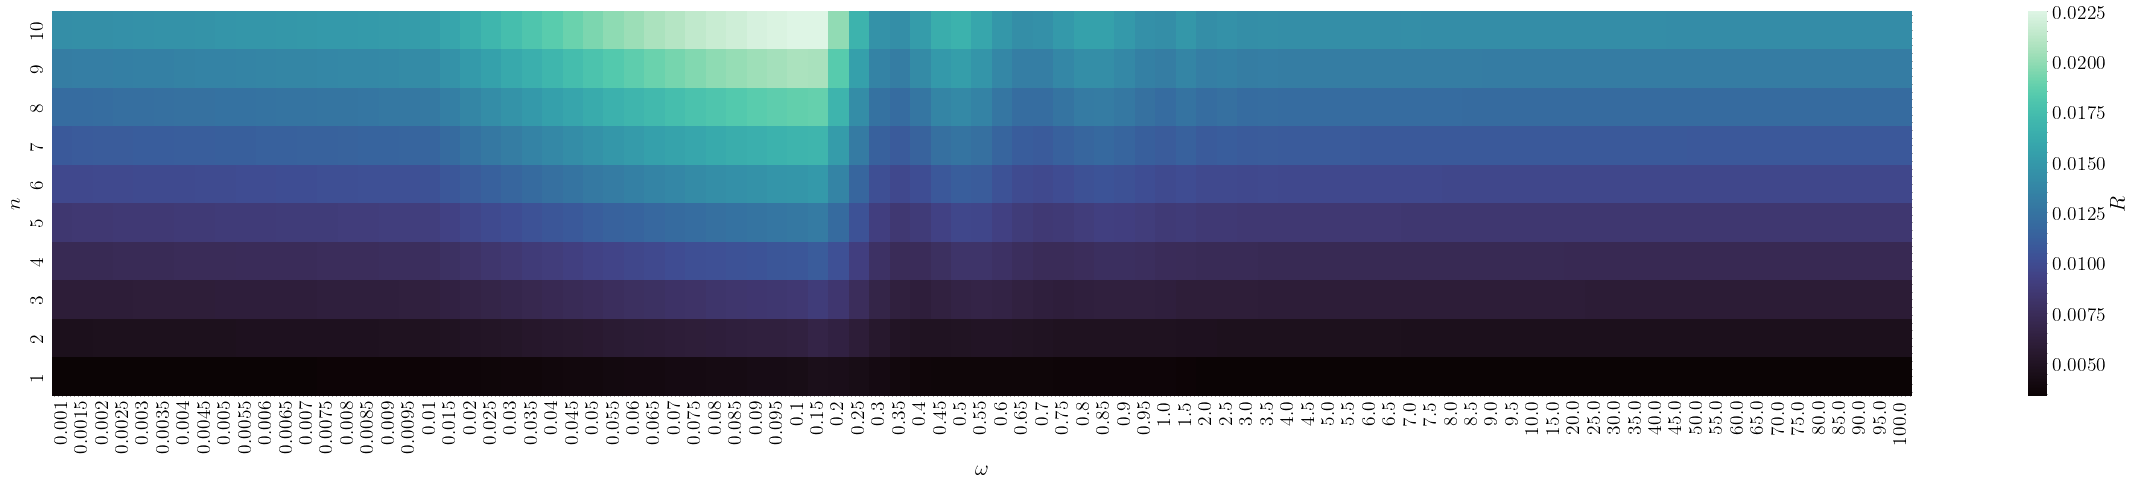

In [10]:
plt.figure(figsize = (30,5))
ax = sns.heatmap(data = df_flujocalor, cmap = "mako", cbar_kws = {"label" : "$R$"}, vmax = np.max(flujocalor), vmin = np.min(flujocalor), robust = True, linewidths = 0.0)
ax.set(xlabel="$\omega$",
       ylabel="$n$",)
ax.invert_yaxis()
plt.savefig("graficas/rectificacion_heatmap.png", dpi = 300, bbox_inches = "tight")
plt.show()